# Apple Quality Prediction

Dans ce notebook, je présente une modélisation simple de la prédiction de la qualité d'une pomme à l'aide d'une base de données de pommes. Cette étude est structurée comme suit :

1. Nettoyage des données
2. Visualisation des données
3. Modèle de MLPClassifier


In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [86]:
df = pd.read_csv("apple_quality.csv")

In [87]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


# Description des colonnes

- **A_id** : L'ID de l'article.
- **Size** : La taille de l'article dans une unité de mesure donnée.
- **Weight** : Le poids de l'article dans une unité de mesure donnée.
- **Sweetness** : Le niveau de douceur de l'article sur une échelle allant de très sucré à très acide.
- **Crunchiness** : Le niveau de croustillant de l'article sur une échelle allant de très mou à très croquant.
- **Juiciness** : Le niveau de jutosité de l'article sur une échelle allant de très sec à très juteux.
- **Ripeness** : Le niveau de maturité de l'article sur une échelle allant de pas mûr à trop mûr.
- **Acidity** : Le niveau d'acidité de l'article sur une échelle allant de très faible à très élevé.
- **Quality** : La notation de qualité globale de l'article, soit "bonne", soit "mauvaise".


# Data Cleaning

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [89]:
df = df.dropna()

df = df.drop(columns=['A_id'])
df = df.astype({'Acidity': 'float64'})

def label(Quality):
      if Quality == "good":
          return 0

      if Quality == "bad":
          return 1

      return None

df['Label'] = df['Quality'].apply(label)
df = df.astype({'Label': 'int64'})

df = df.drop(columns=['Quality'])

# Data Visualization

In [97]:
numerical_cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'Label']

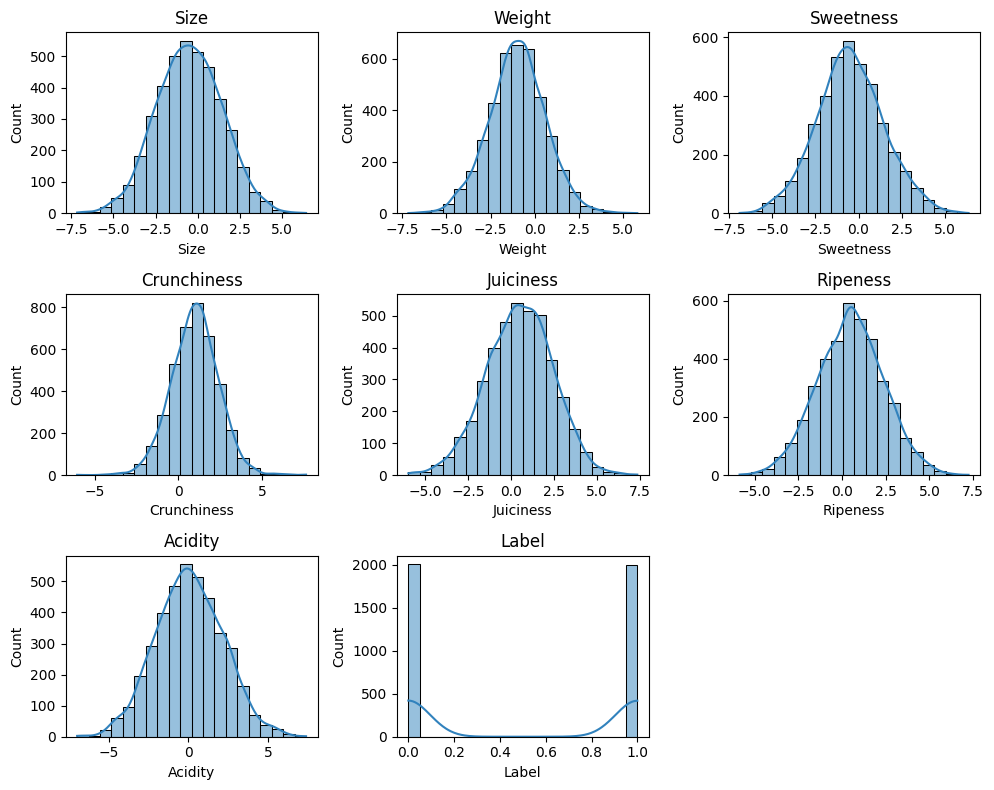

In [123]:
plt.figure(figsize=(10, 8))
sns.set_palette("tab20c")

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(column)

plt.tight_layout()
plt.show()

Feature Selection

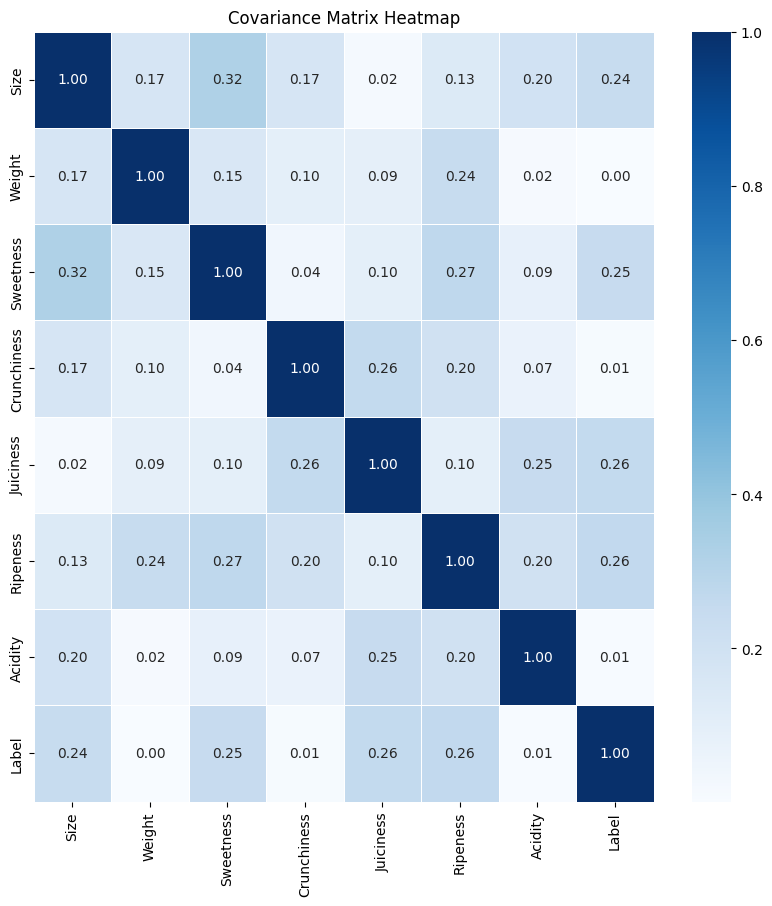

In [99]:
label_encoder = LabelEncoder()
scaler= StandardScaler()

df = df.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)
trainup = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
cov_matrix = abs(trainup.cov())
plt.figure(figsize=(10, 10))
sns.heatmap(cov_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

Imbalance Data

In [103]:
good_count = df['Label'].eq(0).sum()
bad_count = df['Label'].eq(1).sum()
total_count = len(df)

good_percentage = (good_count / total_count) * 100
bad_percentage = (bad_count / total_count) * 100

print("good_percentage: "+str(good_percentage))
print("bad_percentage: "+str(bad_percentage))

good_percentage: 50.1
bad_percentage: 49.9


# Machine learning

Les réseaux de neurones artificiels, et en particulier les réseaux de neurones à propagation avant, offrent une grande flexibilité pour modéliser des relations complexes entre les caractéristiques d'un ensemble de données et leurs étiquettes de classe. Le Multi-layer Perceptron (MLP) est un type de réseau de neurones à propagation avant largement utilisé dans les tâches de classification.

Voici quelques raisons justifiant l'utilisation de MLPClassifier :

 1. Capacité à capturer des relations non linéaires :
   - Les MLP peuvent apprendre des fonctions non linéaires complexes, ce qui est souvent nécessaire pour modéliser des données réelles avec des relations non linéaires entre les caractéristiques et les étiquettes de classe.

 2. Adaptabilité à différents types de données :
   - MLPClassifier peut être utilisé avec succès pour des données à la fois numériques et catégorielles, ce qui le rend polyvalent pour une variété de problèmes de classification.

 3. Flexibilité dans l'architecture du réseau :
   - Vous pouvez personnaliser l'architecture du réseau MLP en spécifiant le nombre de couches cachées, le nombre de neurones par couche, les fonctions d'activation, etc., afin d'ajuster le modèle à la complexité des données et d'optimiser les performances de prédiction.

 4. Adaptabilité à de grandes quantités de données :
   - Les MLP peuvent être entraînés sur de grandes quantités de données à l'aide de techniques de mini-batch et de parallélisme, ce qui en fait une option viable pour les ensembles de données volumineux.



In [115]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score

In [116]:
X = df.drop(['Label'], axis=1)
y = df['Label']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [121]:
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

accuracy = cv_results
average_accuracy = cv_results.mean()

print("Accuracy for each fold:", accuracy)
print("Average Accuracy across all folds:", average_accuracy)


Accuracy for each fold: [0.9        0.93035714 0.93035714 0.90357143 0.91785714]
Average Accuracy across all folds: 0.9164285714285715


Avec une précision moyenne de 91.64% sur les cinq plis de la validation croisée, le modèle semble performer de manière satisfaisante pour prédire la qualité des pommes. Ces résultats sont encourageants et indiquent que le modèle MLPClassifier est capable de capturer les relations complexes entre les caractéristiques des pommes et leur qualité.